In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [44]:
#generating examples
X = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0],[0,0,.5]])
V = np.array([1,0,-1])
b1 = np.array([0,0,1])
b2 = np.array([1])
V = np.reshape(V, (3,1))

In [39]:
def loss(y, y_h):                                        
    return -y*np.log(y_h)-(1-y)*np.log(1-y_h)

def sigmoid(y_h):
    return 1/(1+np.exp(-y_h))

def yhat(x, W, b1, V, b2):
    #this function is used to calculate the value of yhat given the hidden layer and weights
    #param H the value from the hidden layer
    #param V the weights from hidden layer to yhat
    #param b2 biases
    H = x.dot(W)
    H = np.add(H, b1)
    H = np.where(H>0, H, 0)
    yhat = H.dot(V)
    yhat = np.add(yhat, b2)
    return yhat, H

def ff_nn__ReLu(X, W, V, b, c):
    yhats = []
    for x in X:
        y_h, H = yhat(x, W, b, V, c)
        print(sigmoid(y_h))
        yhats.append(sigmoid(y_h))
    return yhats
ff_nn__ReLu(X,W,V,b1,b2)

[[0.67766009]]
[[0.65732439]]
[[0.85018592]]


[array([[0.67766009]]), array([[0.65732439]]), array([[0.85018592]])]

[[42265626.    42199732.125 42133925.    ... 36167248.125 36106277.
  36045319.875]
 [39109382.25  39045963.375 38982631.25  ... 33251079.375 33192583.25
  33134101.125]
 [36135726.    36074732.125 36013825.    ... 30512648.125 30456577.
  30400519.875]
 ...
 [33337382.25  33278763.375 33220231.25  ... 27944679.375 27890983.25
  27837301.125]
 [36135726.    36074732.125 36013825.    ... 30512648.125 30456577.
  30400519.875]
 [39109382.25  39045963.375 38982631.25  ... 33251079.375 33192583.25
  33134101.125]]


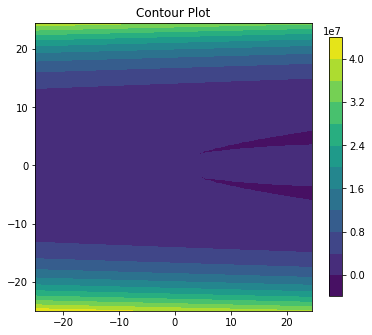

In [37]:
#drawing contour figure of the formula
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])

x_val = np.arange(-25, 25, .5)
y_val = np.arange(-25, 25, .5)
X, Y = np.meshgrid(x_val, y_val)

#computing zhat
def Z(X, Y):
    Z1 = np.subtract(1, np.power(X, 3))
    Z2 = np.subtract(np.square(Y),X)
    Z2 = np.multiply(100, np.square(Z2))
    Z = np.add(Z1, Z2)
    return Z

#calling z function
Z = Z(X, Y)
print(Z)
#plot contour of the function
cm = plt.cm.get_cmap('viridis')
cp = ax.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
fig.colorbar(cp, ax=ax, shrink=0.9)
ax.set_title('Contour Plot')
plt.show()

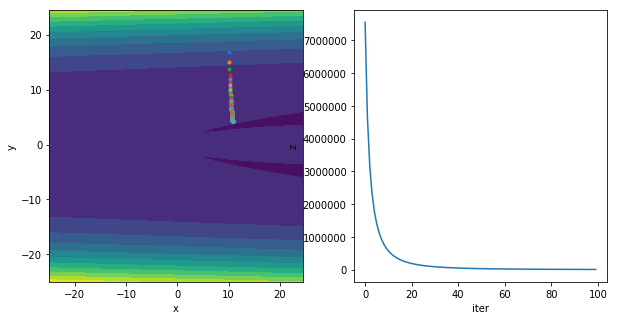

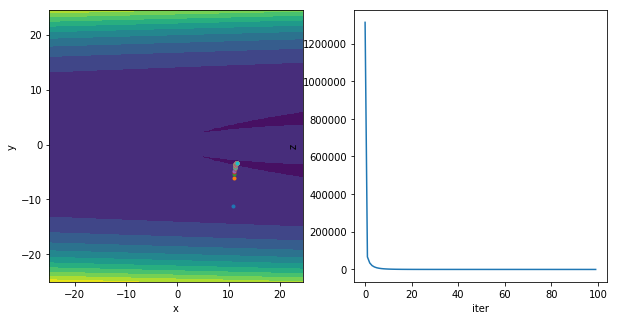

C:\conda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
C:\conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\conda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\conda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


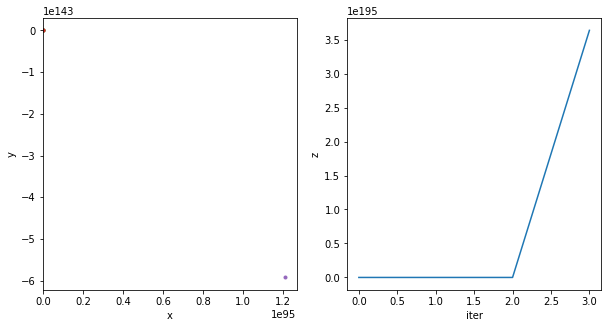

In [53]:
#returns gradients of x and y
def grad_f(x, y):
    dx = -3*x**2-200*y**2+200*x
    dy = 400*y**3-400*x*y
    return np.array([dx, dy])

def grad_desc(x, y, iters, lr):
    steps = []
    zvalue = []
    for i in range(iters):
        dx,dy = grad_f(x, y)
        x = x-lr*dx
        y = y-lr*dy
        z = (1-x**3)+100*(y**2-x)**2
        steps.append([x,y])
        zvalue.append(z)
    return steps, zvalue

#trying different learning rate
for lr in [.000001, .00001, .0001]:
    steps, zvalue = grad_desc(10, 20, 100, lr)
    #visualizing the result
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cm = plt.cm.get_cmap('viridis')
    cp = plt.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
    fig.colorbar(cp, ax=ax, shrink=0.9)
    for step in steps:
        plt.plot(step[0],step[1],'.--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1, 2, 2)
    plt.plot(zvalue)
    plt.xlabel('iter')
    plt.ylabel('z')
    plt.show()


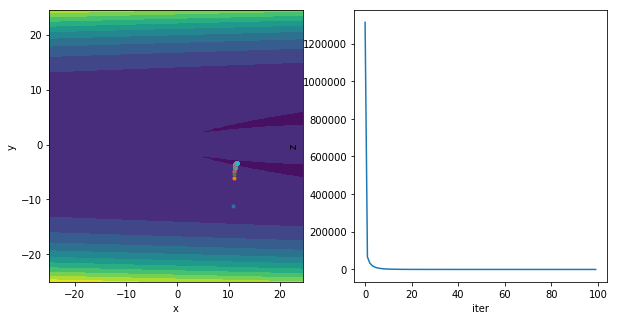

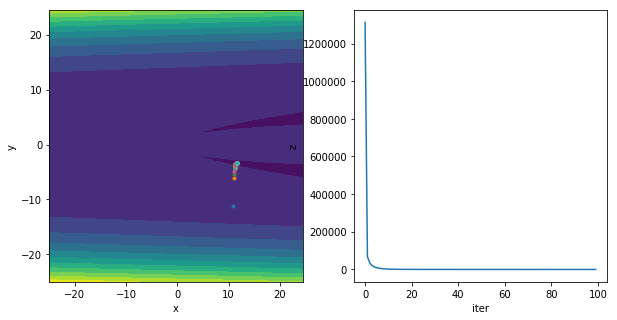

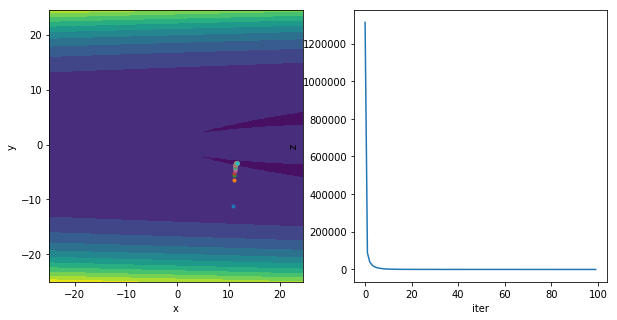

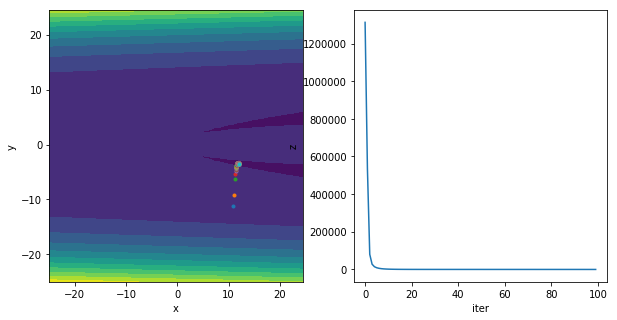

In [49]:
#implement momentum method
def m_grad_desc(x, y, iters, lr, a):
    steps = []
    zvalue = []
    v_x = 0
    v_y = 0
    for i in range(iters):
        dx,dy = grad_f(x, y)
        v_x = a*v_x-lr*dx
        v_y = a*v_y-lr*dy
        x = x+v_x
        y = y+v_y
        z = (1-x**3)+100*(y**2-x)**2
        steps.append([x,y])
        zvalue.append(z)
    return steps, zvalue


for a in [.0001, .001, .01, .1]:
    steps, zvalue = m_grad_desc(10, 20, 100, .00001, a)
    #visualizing the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cm = plt.cm.get_cmap('viridis')
    cp = plt.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
    fig.colorbar(cp, ax=ax, shrink=0.9)
    for step in steps:
        plt.plot(step[0],step[1],'.--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1, 2, 2)
    plt.plot(zvalue)
    plt.xlabel('iter')
    plt.ylabel('z')
    plt.show()

In [69]:
def grad_f(X, y, W, V, b1, b2):
    dV_average = np.zeros((1,3))
    db2_average = np.zeros((1,1))
    dW_average = np.zeros((3, 2))
    db1_average = np.zeros((1, 3))
    for x in X:
        x1, x2 = x
        y_h, H = yhat(x, W, b1, V, b2)
        dy_h = y/y_h-(1-y)/(1-y_h)
        dV = dy_h*H
        db2 = dy_h
        dH = dy_h*V
        dHdW = np.array([[x1, x2],
                        [x1, x2],
                        [x1, x2]])
        dW = np.multiply(dH, dHdW)
        dHdb1 = np.array([1])
        db1 = dH
        dV_average = np.add(dV_average, dV)
        db2_average = np.add(db2_average, db2)
        dW_average = np.add(dW_average, dW)
        db1_average = np.add(db1_average, db1)
    
    print(dV_average[:5])
    return dV_average/len(X), db2_average/len(X),dW_average/len(X), db1_average/len(X)
    
#test
grad_f(X,1,W, V, b1, b2)

[[ 0.66666667  0.         -1.66666667]]


(array([[ 0.22222222,  0.        , -0.55555556]]),
 array([[0.22222222]]),
 array([[ 0.22222222, -1.55555556],
        [ 0.        ,  0.        ],
        [-0.22222222,  1.55555556]]),
 array([[ 0.22222222,  0.22222222,  0.22222222],
        [ 0.        ,  0.        ,  0.        ],
        [-0.22222222, -0.22222222, -0.22222222]]))

[[-1.67492510e+00 -1.52742497e+00]
 [-1.86108526e+00 -1.52055064e+00]
 [-1.36750848e+00 -2.13120942e-01]
 [-4.31179243e-01  5.78655800e-01]
 [-7.89454743e-01  8.49234502e-01]
 [-9.19436472e-01  1.03569588e+00]
 [ 1.26823158e-01 -1.72817985e+00]
 [-6.06284753e-01 -7.86027336e-01]
 [-7.31159550e-01 -1.64880864e+00]
 [-1.67514782e+00 -4.05122756e-01]
 [-6.70718435e-01  7.45523396e-01]
 [ 1.19866155e+00 -1.43075993e+00]
 [ 3.16083922e-01  1.10135257e+00]
 [ 2.10037213e-02  8.76700939e-01]
 [ 1.28072139e+00  1.24306439e+00]
 [ 1.49249644e+00  8.93220008e-01]
 [ 1.19718819e+00  9.30767419e-01]
 [-3.35210754e-01  1.80297277e+00]
 [ 1.22466331e+00  1.97409691e+00]
 [-9.61715645e-01 -2.30903621e-01]
 [-1.56561319e+00  3.16292593e-02]
 [-1.15476060e+00 -1.01096160e+00]
 [ 1.72871888e+00 -5.99533432e-01]
 [ 7.01045826e-01  1.41841901e-02]
 [ 1.67051933e+00  3.99909000e-01]
 [-4.90374996e-01  1.08194700e+00]
 [ 5.96438781e-01  1.67740662e+00]
 [-1.59855058e+00 -1.24875727e+00]
 [-1.38205291e+00 -1

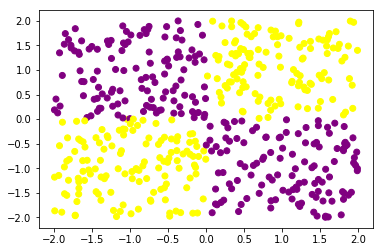

In [33]:
#generating points for xor
def xor(datas):
    #the xor logic gate
    label = np.empty((0,1), int)
    color = []
    for data in datas:
        if data[0] * data[1] > 0:
            np.append([1], label)
            color.append('yellow')
        else:
            np.append([0], label)
            color.append('purple')
    return color, label

def getData(pts):
    #param pts: number of points wanted in the dataset
    data = np.random.uniform(-2, 2, pts * 2).reshape(pts, 2)
    color, label = xor(data)
    return data, color, label
    
data, color, label = getData(500)
plt.scatter(data[:,0],data[:, 1], color = color)
plt.show()

In [41]:
def grad_descent(X, y, start_point, iters, lr):
    W, V, b1, b2 = start_point
    y_h = ff_nn__ReLu(X,W,V,b1,b2)
    for i in range(iters):
        dV, db2,dW, db1 = grad_f(X, y, W, V, b1, b2)
        betas = betas - lr * grad
        W = W-lr*dW
        V = V-lr*dV
        b1 = b1-lr*db1
        b2 = b2-lr*db2
        losses.append(loss(y, yhat(x, W, b1, V, b2)))
        
    return losses
#starting point
W = np.random.rand(2, 3)
V = np.random.rand(3, 1)
b1 = np.random.rand(1, 3)
b2 = np.random.rand(1)

grad_descent(data, label, [W, V, b1, b2], 500, .001)

[[0.63555219]]
[[0.63555219]]
[[0.65991443]]
[[0.74343812]]
[[0.73066671]]
[[0.73220473]]
[[0.6789818]]
[[0.67360012]]
[[0.65232303]]
[[0.64573125]]
[[0.73235883]]
[[0.768636]]
[[0.84047191]]
[[0.80516741]]
[[0.90343009]]
[[0.90210226]]
[[0.88845134]]
[[0.82771958]]
[[0.92248066]]
[[0.6729034]]
[[0.65822494]]
[[0.65098649]]
[[0.85757975]]
[[0.81260397]]
[[0.89418828]]
[[0.77178617]]
[[0.88358696]]
[[0.63555219]]
[[0.63555219]]
[[0.81285107]]
[[0.7167258]]
[[0.64592522]]
[[0.69171398]]
[[0.63555219]]
[[0.89607683]]
[[0.81111679]]
[[0.76553887]]
[[0.72175462]]
[[0.78558892]]
[[0.63555219]]
[[0.86558095]]
[[0.69222693]]
[[0.68494491]]
[[0.79329552]]
[[0.90220814]]
[[0.70334977]]
[[0.85906466]]
[[0.76744759]]
[[0.6555429]]
[[0.66129664]]
[[0.67630306]]
[[0.71004275]]
[[0.74952621]]
[[0.6629893]]
[[0.70850048]]
[[0.75573155]]
[[0.69393068]]
[[0.83667687]]
[[0.86235504]]
[[0.80372083]]
[[0.6885886]]
[[0.76078452]]
[[0.74488894]]
[[0.63879166]]
[[0.86990239]]
[[0.76464716]]
[[0.75249287]]
[[0

ValueError: too many values to unpack (expected 2)